# Análisis de Perturbación de Agitación de átomos

Se analiza la perturbación provocada con distintos modelos de agitación aleatoria usando Montecarlo y Cuasi Montecarlo. 

Se analiza un átomo en particular para analizar promedio y distribución estándar promedio. Los valores aparentemente esperados son distintos promedios, considerando que existe una distribución uniforme entre 0 a 1. Para el caso de la desviación estándar se espera que los modelos de cuasi Montecarlo tengan una convergencia más rápida que los modelos de Montecarlo.



In [27]:
import numpy
import pandas
import matplotlib.pyplot as plt
import os

# Load the data

#sampler_list = ["pseudo", "LHS", "Halton", "Hammersley", "Sobol"]
sampler_list = ["pseudo", "Halton", "Hammersley", "Sobol"]
data = {}
mean_data = {}
std_data = {}
for sampler in sampler_list:
    path = os.path.join('random_coefficients',f'{sampler}_coeff.txt')
    data[sampler] = pandas.read_csv(path, sep=',', header=None)
    
    cum_mean = numpy.cumsum(data[sampler])/numpy.arange(1, data[sampler].shape[0]+1)[:,None]
    cum_mean = numpy.mean(cum_mean, axis=1)
    mean_data[sampler] = cum_mean

    cum_std = numpy.cumsum((data[sampler]-cum_mean)**2)/numpy.arange(1, data[sampler].shape[0]+1)[:,None]
    cum_std = numpy.mean(numpy.sqrt(cum_std), axis=1)
    std_data[sampler] = cum_std
    


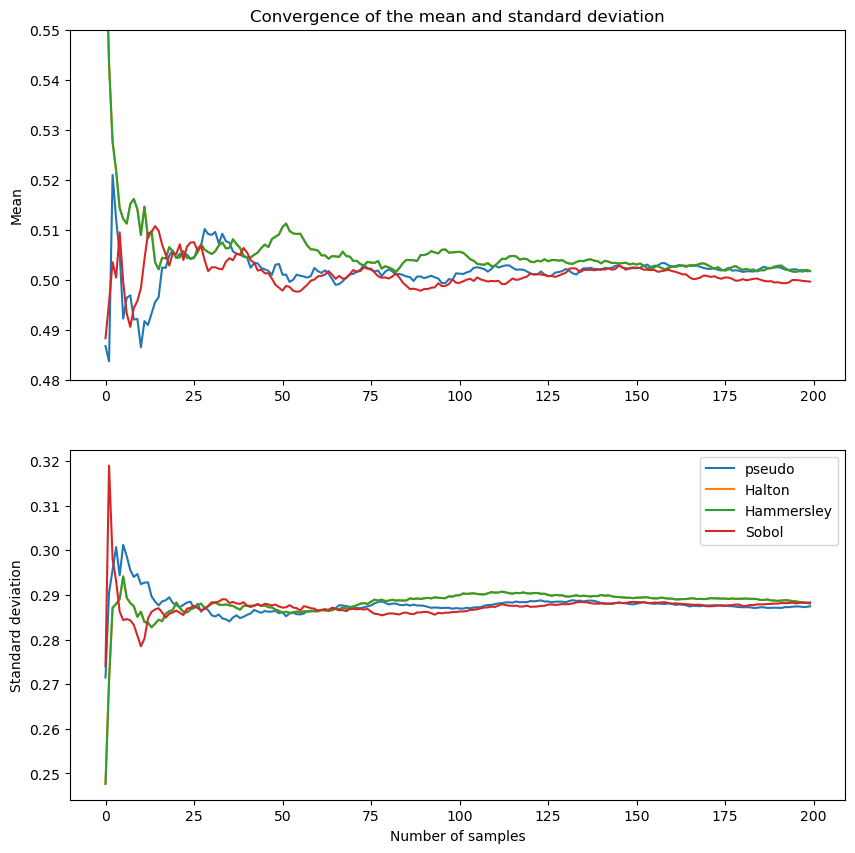

In [ ]:
# Plot the data
# Two plots, one with mean and other with standard deviation

fig, ax = plt.subplots(2, 1, figsize=(10, 10))
for sampler in sampler_list:
    ax[0].plot(mean_data[sampler], label=sampler)
    ax[1].plot(std_data[sampler], label=sampler)
plt.legend()
ax[0].set_ylabel('Mean')
ax[1].set_xlabel('Number of samples')
ax[1].set_ylabel('Standard deviation')
ax[0].set_title('Convergence of the mean and standard deviation of atom position')
# Set lims
ax[0].set_ylim([.48, 0.55])
plt.show()

